In [20]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Example:  A manufacturer of paper used for making grocery bags is interested in improving the tensile strength of the product. Product engineering thinks that tensile strength is a function of the hardwood concentration in the pulp and that the range of hardwood concentrations of practical interest is between 5 and 20%. A team of engineers responsible for the study decides to investigate four levels of hardwood concentration: 5, 10, 15, and 20%. They decide to make up six test specimens at each concentration level, using a pilot plant. All 24 specimens are tested on a laboratory tensile tester, in random order. 

In [21]:
Five=pd.Series([7,8,15,11,9,10],name="5")
Ten=pd.Series([12,17,13,18,19,15],name="10")
Fifteen=pd.Series([14,18,19,17,16,18],name="15")
Twenty=pd.Series([19,25,22,23,18,20],name="20")

In [22]:
# create a pandas dataframe of the name of df; axis=1 is for columns
df=pd.concat([Five,Ten,Fifteen,Twenty],axis='columns')
df

,5,10,15,20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [23]:
# summarize the  data and describe
df.describe()

,5,10,15,20
count,6.000000,6.000000,6.000000,6.000000
mean,10.000000,15.666667,17.000000,21.166667
std,2.828427,2.804758,1.788854,2.639444
min,7.000000,12.000000,14.000000,18.000000
25%,8.250000,13.500000,16.250000,19.250000
50%,9.500000,16.000000,17.500000,21.000000
75%,10.750000,17.750000,18.000000,22.750000
max,15.000000,19.000000,19.000000,25.000000


Text(33.722222222222214, 0.5, 'strength')

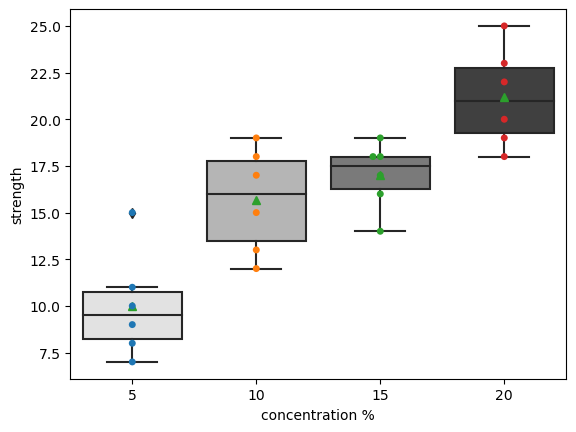

In [24]:
# Plot the data to visualize
ax=sns.boxplot(data=df,showmeans=True,palette="Greys")
ax=sns.swarmplot(data=df)
plt.xlabel("concentration %")
plt.ylabel("strength")

Text(0.5, 9.444444444444438, 'strength')

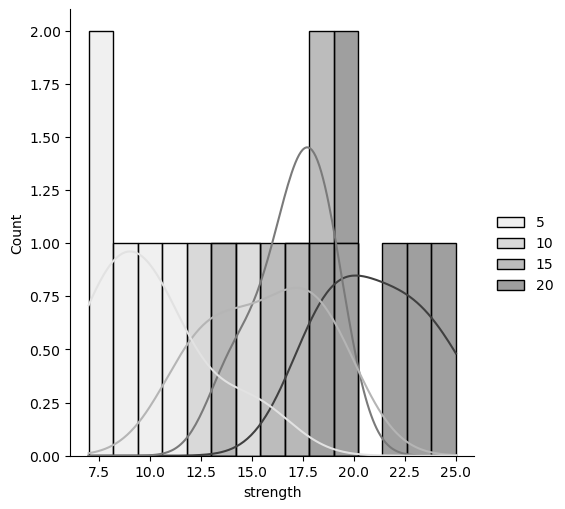

In [25]:
# take a look at the distributions as well
sns.displot(df,palette="Greys",bins=15,kde=True,stat="count")
plt.xlabel("strength")

In [26]:
# review the assumptions for ANOVA

In [27]:
scipy.stats.levene(df["5"],df["10"],df["15"],df["20"])

LeveneResult(statistic=0.5988455988455988, pvalue=0.6231941028644978)

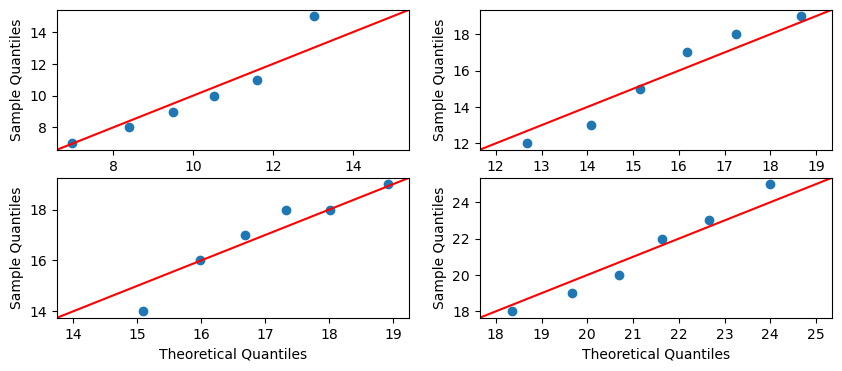

In [28]:
df["5"].sort_values()
df["10"].sort_values()
df["15"].sort_values()
df["20"].sort_values()
fig2,ax2=plt.subplots(nrows=2,ncols=2,figsize=(10,4))
sm.qqplot(df["5"],line='45',loc=np.mean(df["5"]),scale=np.std(df["5"],ddof=1),ax=ax2[0,0])
sm.qqplot(df["10"],line='45',loc=np.mean(df["10"]),scale=np.std(df["10"],ddof=1),ax=ax2[0,1])
sm.qqplot(df["15"],line='45',loc=np.mean(df["15"]),scale=np.std(df["15"],ddof=1),ax=ax2[1,0])
sm.qqplot(df["20"],line='45',loc=np.mean(df["20"]),scale=np.std(df["20"],ddof=1),ax=ax2[1,1])
plt.show()

# Calculate the test statistic

In [29]:
Strengths=pd.Series([7,8,15,11,9,10,12,17,13,18,19,15,14,18,19,17,16,18,19,25,22,23,18,20],name="strengths")
Groups=pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,15,15,15,15,15,15,20,20,20,20,20,20],name="groups")
Groups=Groups.astype("category")

In [30]:
group_means=df.mean()
group_means

5     10.000000
10    15.666667
15    17.000000
20    21.166667
dtype: float64

In [31]:
grand_mean=group_means.mean()
grand_mean

15.958333333333332

In [32]:
TotalSS=np.sum((Strengths-grand_mean)**2)
TotalSS

512.9583333333334

In [33]:
BetweenSS=np.sum(6*(group_means-grand_mean)**2)
BetweenSS

382.79166666666674

In [34]:
WithinSS_1=np.sum((df["5"]-df["5"].mean())**2)
WithinSS_2=np.sum((df["10"]-df["10"].mean())**2)
WithinSS_3=np.sum((df["15"]-df["15"].mean())**2)
WithinSS_4=np.sum((df["20"]-df["20"].mean())**2)

In [35]:
WithinSS=WithinSS_1+WithinSS_2+WithinSS_3+WithinSS_4
WithinSS

130.16666666666666

In [36]:
MSE= WithinSS/20
MSE

6.508333333333333

In [37]:
MST=BetweenSS/3
MST

127.59722222222224

In [38]:
F_statistic=MST/MSE
F_statistic

19.605206999573202

# Compare with F distribution for critical value comparison and p-value

In [39]:
from scipy.stats import f

In [40]:
f.ppf(0.95,3,20)

3.09839121214078

In [41]:
1-f.cdf(F_statistic,3,20)

3.5925782584378396e-06

# Confirm with python 

In [42]:
stats.f_oneway(df["5"],df["10"],df["15"],df["20"])

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

# Post-hoc testig

The populations here are diameter readings while under the 10 different batches. What we do not know at this point is whether the 10 means are all different or which of the means is different from the others, and by how much.

There are several techniques we might use to further analyze the differences. A couple are:

- constructing confidence intervals around the difference of two means,
- multiple comparisons of combinations of factor levels tested simultaneously.

How many pairwise comparisons?  

Create 95% CI around the difference of 2 means using a pooled SEM:  this is the residual standard error / sqrt(n) = sqrt(MSE/n)

In [43]:
np.sqrt(MSE/6)

1.041499986664533

In [44]:
LB5=(np.mean(Five) - 1.96*1.04)
UB5=(np.mean(Five) + 1.96*1.04)
LB10=(np.mean(Ten) - 1.96*1.04)
UB10=(np.mean(Ten) + 1.96*1.04)
LB15=(np.mean(Fifteen) - 1.96*1.04)
UB15=(np.mean(Fifteen) + 1.96*1.04)
LB20=(np.mean(Twenty) - 1.96*1.04)
UB20=(np.mean(Twenty) + 1.96*1.04)

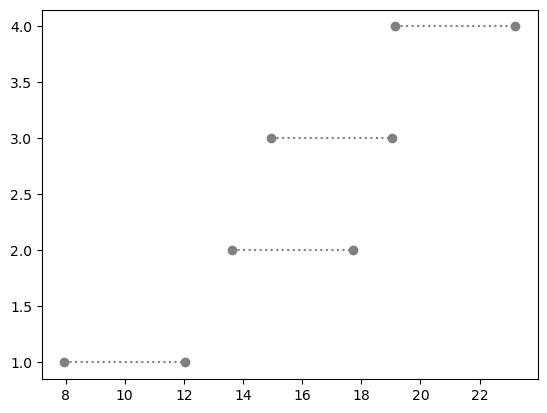

In [45]:
xvalues5=[LB5,UB5]
yvalues5=[1,1]
xvalues10=[LB10,UB10]
yvalues10=[2,2]
xvalues15=[LB15,UB15]
yvalues15=[3,3]
xvalues20=[LB20,UB20]
yvalues20=[4,4]
plt.plot(xvalues5, yvalues5,":",color="grey",marker="o");
plt.plot(xvalues10, yvalues10,":",color="grey",marker="o");
plt.plot(xvalues15, yvalues15,":",color="grey",marker="o");
plt.plot(xvalues20, yvalues20,":",color="grey",marker="o");

In [46]:
dfA=pd.concat([Strengths,Groups],axis='columns')
dfA

,strengths,groups
0,7,5
1,8,5
2,15,5
3,11,5
4,9,5
5,10,5
6,12,10
7,17,10
8,13,10
9,18,10


In [47]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(dfA['strengths'], dfA['groups'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
5,10,-3.4847,0.0059,0.0353,True
5,15,-5.1235,0.0004,0.0027,True
5,20,-7.0703,0.0,0.0002,True
10,15,-0.9818,0.3494,1.0,False
10,20,-3.498,0.0057,0.0345,True
15,20,-3.2009,0.0095,0.0569,False


In [48]:
stats.ttest_ind(df["5"],df["10"])

Ttest_indResult(statistic=-3.484660262185848, pvalue=0.0058752293265014795)

Try a HSD Tukeys Test

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [50]:
mult_comp=pairwise_tukeyhsd(endog=dfA['strengths'], groups=dfA['groups'], alpha=0.05)
print(mult_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     5     10   5.6667 0.0051  1.5441  9.7892   True
     5     15      7.0 0.0007  2.8774 11.1226   True
     5     20  11.1667    0.0  7.0441 15.2892   True
    10     15   1.3333 0.8022 -2.7892  5.4559  False
    10     20      5.5 0.0066  1.3774  9.6226   True
    15     20   4.1667  0.047  0.0441  8.2892   True
----------------------------------------------------


# General linear model

The general linear model (GLM) is the conventional linear regression model for a continuous response variable given continuous and/or categorical predictors. It includes simple linear regression, multiple linear regression, as well as ANOVA. 

For simple linear regression with categorical concentration% predicting tensile strength and dummy coding of the category:

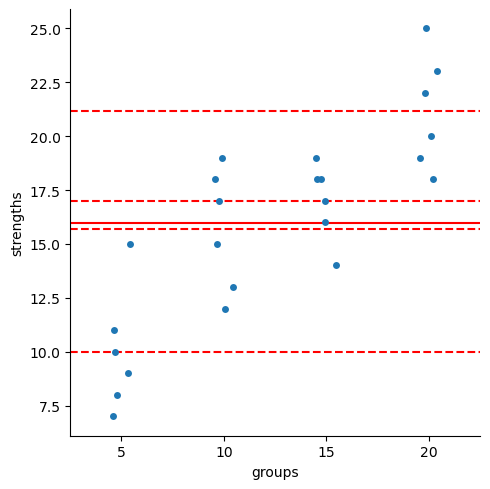

In [51]:
sns.catplot(x="groups",y="strengths",data=dfA)
plt.axhline(y=15.96,color="red")
plt.axhline(y=10, linestyle='--',color="red") 
plt.axhline(y=15.67, linestyle='--',color="red") 
plt.axhline(y=17, linestyle='--',color="red") 
plt.axhline(y=21.17, linestyle='--',color="red") 

In [52]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [53]:
#fit the simple linear regression model
model=ols('strengths~groups',data=dfA)
results=model.fit()
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.708   
Dependent Variable: strengths        AIC:                116.6873
Date:               2023-02-16 08:21 BIC:                121.3995
No. Observations:   24               Log-Likelihood:     -54.344 
Df Model:           3                F-statistic:        19.61   
Df Residuals:       20               Prob (F-statistic): 3.59e-06
R-squared:          0.746            Scale:              6.5083  
------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept       10.0000    1.0415  9.6015  0.0000  7.8275  12.1725
groups[T.10]     5.6667    1.4729  3.8473  0.0010  2.5942   8.7391
groups[T.15]     7.0000    1.4729  4.7525  0.0001  3.9276  10.0724
groups[T.20]    11.1667    1.4729  7.5814  0.0000  8.0942  14.2391
-----------------------------------------------------------------
Omnibus:              0.929        Durbin-Watson:           2.181
Prob(Omnibus):        0.628        Jarque-Bera (JB):        0.861
Skew:                 0.248        Prob(JB):                0.650
Kurtosis:             2.215        Condition No.:           5    
=================================================================

"""

In [55]:
df.describe()

,5,10,15,20
count,6.000000,6.000000,6.000000,6.000000
mean,10.000000,15.666667,17.000000,21.166667
std,2.828427,2.804758,1.788854,2.639444
min,7.000000,12.000000,14.000000,18.000000
25%,8.250000,13.500000,16.250000,19.250000
50%,9.500000,16.000000,17.500000,21.000000
75%,10.750000,17.750000,18.000000,22.750000
max,15.000000,19.000000,19.000000,25.000000


In [56]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(results)
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
groups,3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


# Simple linear regression with continuous response (dependent) variable and continuous predcitor (independent) variable

In [57]:
Strengths_Num=pd.Series([7,8,15,11,9,10,12,17,13,18,19,15,14,18,19,17,16,18,19,25,22,23,18,20],name="strengths")
Groups_Num=pd.Series([5,5,5,5,5,5,10,10,10,10,10,10,15,15,15,15,15,15,20,20,20,20,20,20],name="conc")

In [58]:
df_Num=pd.concat([Strengths_Num,Groups_Num],axis='columns')
df_Num

,strengths,conc
0,7,5
1,8,5
2,15,5
3,11,5
4,9,5
5,10,5
6,12,10
7,17,10
8,13,10
9,18,10


In [59]:
#fit the simple linear regression model
model=ols('strengths~conc',data=df_Num)
results_Num=model.fit()
results_Num.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.696   
Dependent Variable: strengths        AIC:                115.9224
Date:               2023-02-16 08:01 BIC:                118.2785
No. Observations:   24               Log-Likelihood:     -55.961 
Df Model:           1                F-statistic:        53.76   
Df Residuals:       22               Prob (F-statistic): 2.43e-07
R-squared:          0.710            Scale:              6.7705  
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     7.2500     1.3010   5.5726   0.0000   4.5519   9.9481
conc          0.6967     0.0950   7.3324   0.0000   0.4996   0.8937
-----------------------------------------------------------------
Omnibus:              1.760        Durbin-Watson:           1.903
Prob(Omnibus):        0.415        Jarque-Bera (JB):        1.325
Skew:                 0.368        Prob(JB):                0.515
Kurtosis:             2.116        Condition No.:           34   
=================================================================

"""

In [60]:
anova_results_Num = anova_lm(results_Num)
anova_results_Num

,df,sum_sq,mean_sq,F,PR(>F)
conc,1.0,364.008333,364.008333,53.764239,2.430449e-07
Residual,22.0,148.950000,6.770455,NaN,NaN


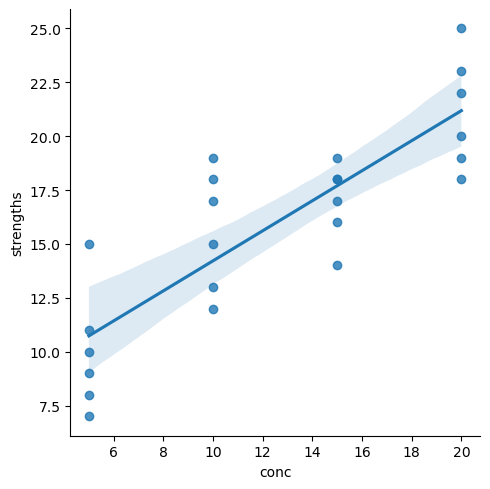

In [61]:
sns.lmplot(x="conc",y="strengths",data=df_Num)